# SuPreMo-Akita walkthrough

In this walkthrough, we will run get_Akita_scores on CTCF binding site deletions, which we generated in [custom_perturbations.ipynb](https://github.com/ketringjoni/Akita_variant_scoring/blob/main/walkthroughs/custom_perturbations.ipynb).

To do so, we've run the following command (the output of the following cell) in the terminal. By changing the variables below, you can get a command that fits your custom set of perturbations. Note: there are more arguments available that are not included here.  

In [1]:
import pandas as pd
import numpy as np
import os
from collections import Counter

In [2]:
# Change the following paths to match your working directory/input file/output files

data_dir = 'test_data/custom_perturbations/'

in_file = f'{data_dir}input/CTCF_del_symb_alleles.txt' # Input directory
directory = f'{data_dir}output' # Output directory

In [3]:
# Write command

shift_by = '-1 0 1' # Shift sequences by 1 bp left and right
revcomp = 'add_revcomp' # Also score the reverse complement of all sequences
file = 'CTCF_del' # Output files prefix

out_file = os.path.join(directory, file) # Path to output files

print('Run this command in the main directory:\n')
print('python scripts/SuPreMo.py', in_file,
      '--shift_by', shift_by,
      '--revcomp', revcomp,
      '--file', file,
      '--dir', directory,
      '--get_Akita_scores',
      '--get_maps',
      '--get_tracks')


Run this command in the main directory:

python scripts/SuPreMo.py test_data/custom_perturbations/input/CTCF_del_symb_alleles.txt --shift_by -1 0 1 --revcomp add_revcomp --file CTCF_del --dir test_data/custom_perturbations/output --get_Akita_scores --get_maps --get_tracks


In [4]:
# Read input

import sys
sys.path.insert(0, '../scripts')

import reading_utils
reading_utils.var_set_size = 10000000000

variants = reading_utils.read_input(f'../{in_file}', 0)
variants[:10]

,CHROM,POS,REF,ALT,END,SVTYPE,SVLEN
0,chr1,100276250,-,-,100276269,DEL,19
1,chr1,101106697,-,-,101106716,DEL,19
2,chr1,101159421,-,-,101159440,DEL,19
3,chr1,101442377,-,-,101442396,DEL,19
4,chr1,101526743,-,-,101526762,DEL,19
5,chr1,101595702,-,-,101595721,DEL,19
6,chr1,101693506,-,-,101693525,DEL,19
7,chr1,101744879,-,-,101744898,DEL,19
8,chr1,102007853,-,-,102007872,DEL,19
9,chr1,10192988,-,-,10193007,DEL,19


# Filtered_out file

Check filtered_out file for any perturbations that were filtered out

In [6]:
# Read filtered out file

filtered_out_file = f'../{out_file}_filtered_out'

if os.path.getsize(filtered_out_file) == 0:
    
    print('No perturbations were filtered out.')

else:
    
    with open(filtered_out_file) as f:
        filtered_out = f.read().splitlines()
        
    # Get the number of variants that were filtered out for each type of reason

    print(Counter([x.split(': ')[1] for x in filtered_out]))
    
    
    # Get list of perturbations (input row number) that were filtered out

    filtered_out_rows = np.unique([int(x.split(': ')[0]) for x in filtered_out])

    print(filtered_out_rows[:10])

No perturbations were filtered out.


# Log file

Check the log file for errors and warnings

In [7]:
# Read log file

with open(f'../{out_file}_log') as f: # 
    log = f.read().splitlines()

log[:10]

['0 (-1 shift)',
 '0 (0 shift)',
 '0 (0 shift_revcomp)',
 '0 (1 shift)',
 '1 (-1 shift)',
 '1 (0 shift)',
 '1 (0 shift_revcomp)',
 '1 (1 shift)',
 '2 (-1 shift)',
 '2 (0 shift)']

In [19]:
print('There are',len(log),'log messages so the counts below are out of', len(log))

There are 300 log messages so the counts below are out of 300


## Warnings

In [20]:
# Get perturbations that had warnings

warnings = [x for x in log if 'Warning' in x]

warnings[:10]

[]

In [21]:
# Get the number of each type of warning message

Counter([x.split('Warning: ')[1] for x in warnings])

Counter()

In [22]:
# Get list of perturbations (input row number) that have warnings in at least one of the conditions

warning_rows = np.unique([x.split(' (')[0] for x in warnings])

warning_rows[:10]

array([], dtype=float64)

## Errors

In [23]:
# Get perturbations that had errors

errors = [x for x in log if 'Error' in x]
error_messages = [x.split('Error: ')[1] for x in errors]

errors[:10]

[]

In [24]:
# These are all the expected error messages

with open('../scripts/get_seq_utils.py', 'r') as f:
    get_seq_error_messages = np.unique([l.split('\'')[1] for l in f if 'raise ValueError' in l])

print('get_seq expected error messages:\n\n', get_seq_error_messages, '\n\n')

with open('../scripts/get_Akita_scores_utils.py', 'r') as f:
    get_Akita_scores_error_messages = np.unique([l.split('\'')[1] for l in f if 'raise ValueError' in l])

print('get_Akita_scores expected error messages:\n\n', get_Akita_scores_error_messages)


get_seq expected error messages:

 ['Alternate sequence generated is not the right length.'
 'Cannot generate 1Mb sequence for this chromosomal rearrangement.'
 'Centromeric variant.' 'N composition greater than 5%.'
 'Reference allele does not match hg38.'
 'Reference sequence generated is not the right length.'
 'SV type not supported.'
 'Sequence for the alternate allele does not match hg38 at REF position.'
 'Unexpected format: BND ALT does not include REF.'
 'Variant larger than set limit.'] 


get_Akita_scores expected error messages:

 ['Masked alternate matrix is not the right size.'
 'Masked reference matrix is not the right size.'
 'Variant outside prediction window after cropping.']


In [25]:
# Get the number of each type of expected error message

Counter(error_messages)

Counter()

In [26]:
# Get number of get_seq and get_Akita_scores error messages

print(len([x for x in error_messages if x in get_seq_error_messages]), 'get_seq error messages')
print(len([x for x in error_messages if x in get_Akita_scores_error_messages]), 'get_Akita_scores error messages')

0 get_seq error messages
0 get_Akita_scores error messages


In [27]:
# Check if any of these errors are unexpected

[x for x in error_messages if x not in get_seq_error_messages and x not in get_Akita_scores_error_messages]

[]

In [28]:
# Get list of perturbations (input row number) that have errors in at least one of the conditions

error_rows = np.unique([x.split(' (')[0] for x in errors])

error_rows[:10]

array([], dtype=float64)

# Scores file

In [35]:
# Read scores file

scores = pd.read_csv(f'../{out_file}_scores', sep = '\t')
scores.iloc[:10,:10]

,var_index,mse_-1,corr_-1,mse_-1_revcomp,corr_-1_revcomp,mse_0,corr_0,mse_0_revcomp,corr_0_revcomp,mse_1
0,0,0.003009,0.984663,0.009729,0.945812,0.006867,0.960436,0.002413,0.986691,0.007648
1,1,0.004472,0.992411,0.008358,0.989194,0.004990,0.991197,0.002999,0.995586,0.002163
2,2,0.006182,0.989617,0.005114,0.993450,0.009294,0.984339,0.015025,0.981446,0.011341
3,3,0.014067,0.958523,0.002888,0.992808,0.004430,0.984087,0.007716,0.967367,0.009354
4,4,0.005012,0.973819,0.002822,0.983123,0.004997,0.980311,0.004549,0.979318,0.008886
5,5,0.003381,0.984231,0.004742,0.974394,0.003852,0.981589,0.005844,0.969958,0.002104
6,6,0.004194,0.964545,0.005160,0.938284,0.003161,0.979445,0.009026,0.892434,0.002438
7,7,0.003248,0.968563,0.013756,0.846422,0.005499,0.931995,0.006983,0.924625,0.002999
8,8,0.002732,0.878060,0.001859,0.925405,0.002384,0.885885,0.000988,0.935623,0.000752
9,9,0.003190,0.990839,0.020391,0.942609,0.003946,0.990144,0.010735,0.970131,0.005486


In [36]:
# These are all the scores that were calculated 
scores.columns[1:]

Index(['mse_-1', 'corr_-1', 'mse_-1_revcomp', 'corr_-1_revcomp', 'mse_0',
       'corr_0', 'mse_0_revcomp', 'corr_0_revcomp', 'mse_1', 'corr_1',
       'mse_1_revcomp', 'corr_1_revcomp'],
      dtype='object')

In [37]:
# Add scores dataframe to input dataframe to match them with information about the perturbations

scores = pd.concat([variants, scores], axis = 1)
scores.iloc[:10,:10]

,CHROM,POS,REF,ALT,END,SVTYPE,SVLEN,var_index,mse_-1,corr_-1
0,chr1,100276250,-,-,100276269,DEL,19,0,0.003009,0.984663
1,chr1,101106697,-,-,101106716,DEL,19,1,0.004472,0.992411
2,chr1,101159421,-,-,101159440,DEL,19,2,0.006182,0.989617
3,chr1,101442377,-,-,101442396,DEL,19,3,0.014067,0.958523
4,chr1,101526743,-,-,101526762,DEL,19,4,0.005012,0.973819
5,chr1,101595702,-,-,101595721,DEL,19,5,0.003381,0.984231
6,chr1,101693506,-,-,101693525,DEL,19,6,0.004194,0.964545
7,chr1,101744879,-,-,101744898,DEL,19,7,0.003248,0.968563
8,chr1,102007853,-,-,102007872,DEL,19,8,0.002732,0.878060
9,chr1,10192988,-,-,10193007,DEL,19,9,0.003190,0.990839


## Compare scores

In [43]:
import matplotlib.pyplot as plt
from scipy import stats

In [44]:
# Function for plotting 2 variables and getting the correlation between them

def compare_scores(x_axis, x_axis_label, y_axis, y_axis_label):
    plt.scatter(x_axis, y_axis)

    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label,rotation=90)

    z = np.polyfit(x_axis, y_axis, 1)
    p = np.poly1d(z)
    plt.plot(x_axis,p(x_axis),"r--")

    print(f'correlation between {x_axis_label} and {y_axis_label} =', stats.spearmanr(x_axis, y_axis)[0])

    plt.show()

correlation between Mean squared error and Spearman correlation = 0.33560624249699883


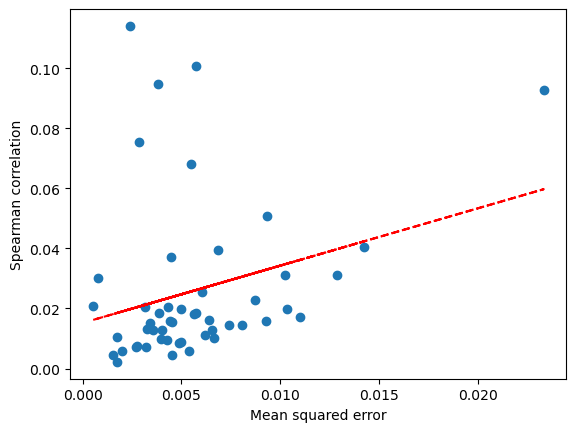

In [45]:
# Compare scoring methods
compare_scores(scores.mse_0, 'Mean squared error', 1 - scores.corr_0, 'Spearman correlation')

correlation between No shift and Shift = 0.31188475390156056


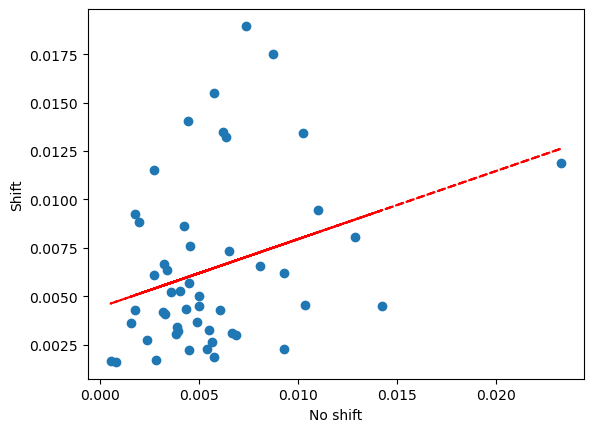

In [46]:
# Compare augmentated scores

scoring_method = 'mse'
shift = '-1'

no_shift = scores[f'{scoring_method}_0']
shift = scores[f'{scoring_method}_{shift}']

compare_scores(no_shift, 'No shift', shift, 'Shift')

## Rank perturbations

In [47]:
# Get the average augmented score

scoring_method = 'mse'

scores[f'{scoring_method}_mean'] = scores[[f'{scoring_method}_-1', 
                                            f'{scoring_method}_0', 
                                            f'{scoring_method}_1', 
                                            f'{scoring_method}_0_revcomp']].mean(axis = 1)

In [48]:
# Get most disruptive CTCF site

scores.sort_values('mse_mean', ascending = False).head()

,CHROM,POS,REF,ALT,END,SVTYPE,SVLEN,var_index,mse_-1,corr_-1,...,mse_0_revcomp,corr_0_revcomp,ssi_0_revcomp,mse_1,corr_1,ssi_1,mse_1_revcomp,corr_1_revcomp,ssi_1_revcomp,mse_mean
36,chr1,109743693,-,-,109743712,DEL,19,36,0.009441,0.984032,...,0.010898,0.990651,0.867035,0.034233,0.955841,0.736973,0.007988,0.987304,0.873855,0.016392
13,chr1,989207,-,-,989226,DEL,19,13,0.015484,0.947087,...,0.010503,0.977292,0.840644,0.026289,0.910490,0.769935,0.015385,0.970411,0.808772,0.014507
30,chr1,108906070,-,-,108906089,DEL,19,30,0.011858,0.956635,...,0.010571,0.942356,0.777392,0.006154,0.975538,0.854439,0.023333,0.869321,0.727686,0.012974
31,chr1,108987868,-,-,108987887,DEL,19,31,0.017539,0.970300,...,0.007915,0.970819,0.843003,0.013771,0.960410,0.772101,0.017221,0.940970,0.732398,0.011984
37,chr1,109974651,-,-,109974670,DEL,19,37,0.018969,0.973342,...,0.012834,0.973759,0.776421,0.008122,0.985505,0.847572,0.014618,0.963264,0.765651,0.011827


# Maps files

In [31]:
import sys
sys.path.insert(0, '../scripts')

import math
import plotting_utils

In [32]:
# Read in maps
maps = np.load(f'../{out_file}_maps.npy', allow_pickle="TRUE").item()

In [33]:
maps.keys()

dict_keys(['0_-1', '0_-1_revcomp', '0_0', '0_0_revcomp', '0_1', '0_1_revcomp', '1_-1', '1_-1_revcomp', '1_0', '1_0_revcomp', '1_1', '1_1_revcomp', '2_-1', '2_-1_revcomp', '2_0', '2_0_revcomp', '2_1', '2_1_revcomp', '3_-1', '3_-1_revcomp', '3_0', '3_0_revcomp', '3_1', '3_1_revcomp', '4_-1', '4_-1_revcomp', '4_0', '4_0_revcomp', '4_1', '4_1_revcomp', '5_-1', '5_-1_revcomp', '5_0', '5_0_revcomp', '5_1', '5_1_revcomp', '6_-1', '6_-1_revcomp', '6_0', '6_0_revcomp', '6_1', '6_1_revcomp', '7_-1', '7_-1_revcomp', '7_0', '7_0_revcomp', '7_1', '7_1_revcomp', '8_-1', '8_-1_revcomp', '8_0', '8_0_revcomp', '8_1', '8_1_revcomp', '9_-1', '9_-1_revcomp', '9_0', '9_0_revcomp', '9_1', '9_1_revcomp', '10_-1', '10_-1_revcomp', '10_0', '10_0_revcomp', '10_1', '10_1_revcomp', '11_-1', '11_-1_revcomp', '11_0', '11_0_revcomp', '11_1', '11_1_revcomp', '12_-1', '12_-1_revcomp', '12_0', '12_0_revcomp', '12_1', '12_1_revcomp', '13_-1', '13_-1_revcomp', '13_0', '13_0_revcomp', '13_1', '13_1_revcomp', '14_-1', '14_

In [39]:
# Choose the conditions of the map you would like to extract

var_index = 0 # Row number from input

# Leave the following as is if not specified in the run
shift = 0 
revcomp = ''


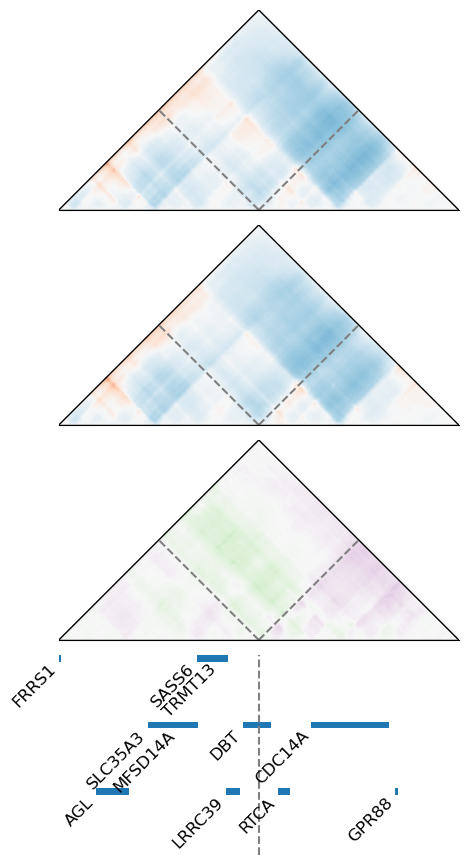

In [40]:
# Plot maps for the chosen variant

variant_id = f'{var_index}_{shift}{revcomp}'

REF_pred, ALT_pred = maps[variant_id][:2]
rel_pos_map, map_start_coord = maps[variant_id][2:]

CHR = scores[scores.var_index == var_index].CHROM[0]

if 'SVLEN' in variants.columns:
    SVLEN = variants.iloc[var_index].SVLEN
    SVTYPE = variants.iloc[var_index].SVTYPE
else:
    SVTYPE, SVLEN = '-', '-'

genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)

lines = plotting_utils.get_var_bins(rel_pos_map, SVTYPE, SVLEN)

plotting_utils.plot_maps_genes([REF_pred, ALT_pred], genes_in_map, lines)

# Tracks files

In [44]:
# Read in maps

tracks = np.load(f'../{out_file}_tracks.npy', allow_pickle="TRUE").item()

In [45]:
tracks.keys()

dict_keys(['0_mse_track_-1', '0_corr_track_-1', '0_mse_track_-1_revcomp', '0_corr_track_-1_revcomp', '0_mse_track_0', '0_corr_track_0', '0_mse_track_0_revcomp', '0_corr_track_0_revcomp', '0_mse_track_1', '0_corr_track_1', '0_mse_track_1_revcomp', '0_corr_track_1_revcomp', '1_mse_track_-1', '1_corr_track_-1', '1_mse_track_-1_revcomp', '1_corr_track_-1_revcomp', '1_mse_track_0', '1_corr_track_0', '1_mse_track_0_revcomp', '1_corr_track_0_revcomp', '1_mse_track_1', '1_corr_track_1', '1_mse_track_1_revcomp', '1_corr_track_1_revcomp', '2_mse_track_-1', '2_corr_track_-1', '2_mse_track_-1_revcomp', '2_corr_track_-1_revcomp', '2_mse_track_0', '2_corr_track_0', '2_mse_track_0_revcomp', '2_corr_track_0_revcomp', '2_mse_track_1', '2_corr_track_1', '2_mse_track_1_revcomp', '2_corr_track_1_revcomp', '3_mse_track_-1', '3_corr_track_-1', '3_mse_track_-1_revcomp', '3_corr_track_-1_revcomp', '3_mse_track_0', '3_corr_track_0', '3_mse_track_0_revcomp', '3_corr_track_0_revcomp', '3_mse_track_1', '3_corr_tr

In [ ]:
# Choose the conditions of the map you would like to extract

var_index = 0 # Row number from input
scoring_method = 'mse' # Scoring method used. Default is mse (mean squared error) and corr (spearman correlation)

# Leave the following as is if not specified in the run
shift = 0 
revcomp = ''


In [46]:
# Get disruption track

variant_id = f'{var_index}_{scoring_method}_track_{shift}{revcomp}'

disruption_track = tracks[variant_id]


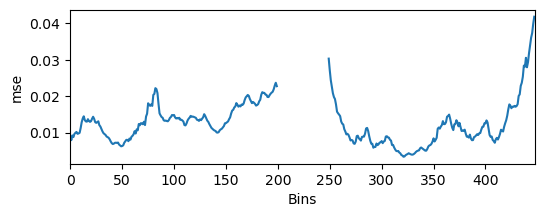

In [31]:
# Plot disruption track

plotting_utils.plot_disruption_tracks(disruption_track, scoring_method)

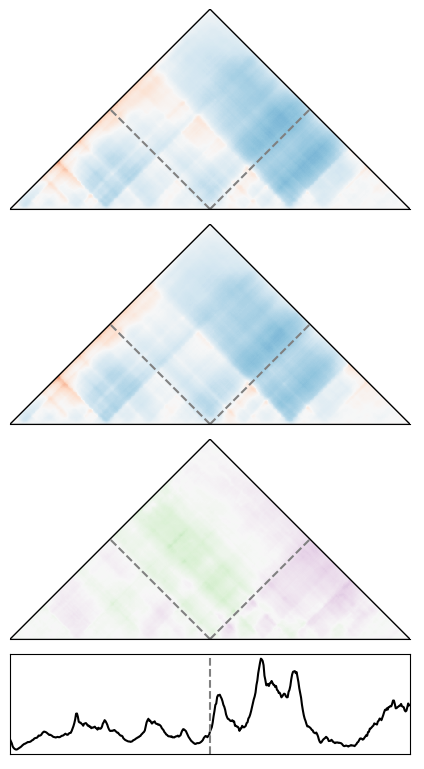

In [56]:
# Plot disruption tracks alongside maps from above

plotting_utils.plot_maps_tracks([REF_pred, ALT_pred], lines, disruption_track)